# Boosting / Clasificacion ML Diabetes

In [796]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Paso 1. Lectura del conjunto de datos procesado

In [797]:
df = pd.read_csv('../data/raw/internal-link(4).csv')

df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Paso 2. Selección de variables

In [798]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [799]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [800]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [801]:
y.unique()

array([1, 0])

## Paso 3. Modelado

In [802]:
ada = AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=18)
xgb = XGBClassifier(n_estimators=5,
                        learning_rate=0.1,
                        random_state=18)

### 3.1. Entrenamiento

In [803]:
ada.fit(X_train, y_train)

,estimator,None
,n_estimators,200
,learning_rate,0.1
,algorithm,'deprecated'
,random_state,18


In [804]:
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [805]:
ada_y_pred_test = ada.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)

r2_train = (r2_score(y_train, ada_y_pred_train),
            r2_score(y_train, xgb_y_pred_train))
r2_test = (r2_score(y_test, ada_y_pred_test),
           r2_score(y_test, xgb_y_pred_test))

r2 = pd.DataFrame(data=[r2_train, r2_test],
                  columns=['AdaBoost', 'XGBoost'],
                  index=['Train set', 'Test set'])

r2

In [806]:
accuracy_train = (accuracy_score(y_train, ada_y_pred_train),
                  accuracy_score(y_train, xgb_y_pred_train))
accuracy_test = (accuracy_score(y_test, ada_y_pred_test),
                 accuracy_score(y_test, xgb_y_pred_test))

accuracy = pd.DataFrame(data=[accuracy_train, accuracy_test],
                        columns=['AdaBoost', 'XGBoost',],
                        index=['Train set', 'Test set'])

accuracy

,AdaBoost,XGBoost
Train set,0.783388,0.798046
Test set,0.759740,0.753247


Sub 3 Arbol de desicion

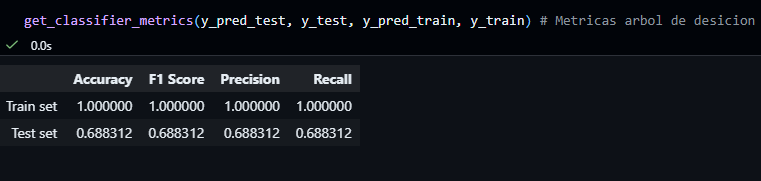